# **Supervised Learning — Regresi**

### **A1. Implementasi Metode**

**1. Import Library dan Dataset**

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.pipeline import Pipeline

# Baca dataset
df = pd.read_csv("ndtv_data_final.csv")

# Buat fitur PPI
df["PPI"] = np.sqrt(df["Resolution x"]**2 + df["Resolution y"]**2) / df["Screen size (inches)"]

# Normalisasi data numerik
numeric_cols = df.select_dtypes(include="number").columns
scaler = StandardScaler()
df_scaled = df.copy()
df_scaled[numeric_cols] = scaler.fit_transform(df_scaled[numeric_cols])

# Encoding data kategorikal
cat_cols = df_scaled.select_dtypes(include="object").columns
le = LabelEncoder()
for col in cat_cols:
    df_scaled[col] = le.fit_transform(df_scaled[col])

print("Data siap untuk modeling")


Data siap untuk modeling



*   Library pandas, numpy, matplotlib, dan seaborn digunakan untuk analisis data dan visualisasi
*   StandardScaler digunakan untuk menormalkan fitur numerik agar semua berada pada skala yang sama,ini penting untuk algoritma seperti SVR
*   LabelEncoder digunakan untuk mengubah fitur kategorikal menjadi angka
*   Fitur PPI ditambahkan untuk memperkaya informasi yang digunakan model



**2. Split Data Training dan Testing**

In [16]:
X = df_scaled[["RAM (MB)", "Internal storage (GB)", "PPI"]]
y = df_scaled["Price"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print("Data Training:", X_train.shape)
print("Data Testing :", X_test.shape)


Data Training: (1087, 3)
Data Testing : (272, 3)




*   Dataset dibagi menjadi data training (80%) dan data testing (20%)
*   Data training digunakan untuk melatih model, sedangkan data testing digunakan untuk menguji seberapa baik model melakukan prediksi terhadap data baru
*   Pembagian data penting untuk menghindari overfitting (model hanya bagus di data latih tapi buruk di data baru)






**3. Linear Regression**

In [17]:
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)




*   Linear Regression mencoba membentuk garis lurus terbaik yang mewakili hubungan antara fitur (RAM, storage, PPI) dan harga (Price)
*   Metode ini cepat, sederhana, dan sering digunakan sebagai baseline untuk regresi



**4. Support Vector Regressor (Point Plus)**

In [18]:
svr = Pipeline([
    ("scaler", StandardScaler()),
    ("svr", SVR(kernel="rbf", C=10, epsilon=0.1))
])
svr.fit(X_train, y_train)
y_pred_svr = svr.predict(X_test)




*   SVR adalah varian regresi dari SVM

*   Menggunakan kernel rbf agar dapat menangkap hubungan non-linear antara fitur dan harga
*   Cocok jika data memiliki pola yang lebih kompleks daripada garis lurus




**5. Random Forest Regressor**

In [19]:
rf = RandomForestRegressor(n_estimators=200, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)




*   Random Forest adalah model ensemble yang menggabungkan banyak pohon keputusan
*   Model ini tahan terhadap overfitting dan biasanya memberikan hasil yang stabil dan akurat



### **A2. Evaluasi Model**

**1. Menghitung Metrik Evaluasi**

In [20]:
def eval_model(y_true, y_pred, nama):
    mae = mean_absolute_error(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_true, y_pred)
    print(f"{nama} -> MAE: {mae:.3f}, MSE: {mse:.3f}, RMSE: {rmse:.3f}, R²: {r2:.3f}")

eval_model(y_test, y_pred_lr, "Linear Regression")
eval_model(y_test, y_pred_svr, "SVR")
eval_model(y_test, y_pred_rf, "Random Forest")


Linear Regression -> MAE: 0.395, MSE: 0.615, RMSE: 0.784, R²: 0.552
SVR -> MAE: 0.355, MSE: 0.853, RMSE: 0.924, R²: 0.379
Random Forest -> MAE: 0.352, MSE: 0.663, RMSE: 0.814, R²: 0.518




*   MAE (Mean Absolute Error) adalah seberapa besar rata-rata selisih absolut antara prediksi dan nilai asli. Semakin kecil semakin baik

*   MSE (Mean Squared Error) seperti MAE, tapi kesalahan dikuadratkan, sehingga kesalahan besar lebih berpengaruh.
*   RMSE (Root MSE) adalah akar dari MSE, mengembalikan satuan yang sama dengan harga


*   R2 Score adalah seberapa besar variasi harga yang dapat dijelaskan oleh model. Nilai mendekati 1 berarti model sangat baik



### **A3. Visualisasi Hasil Prediksi**

**1. Scatter Plot**

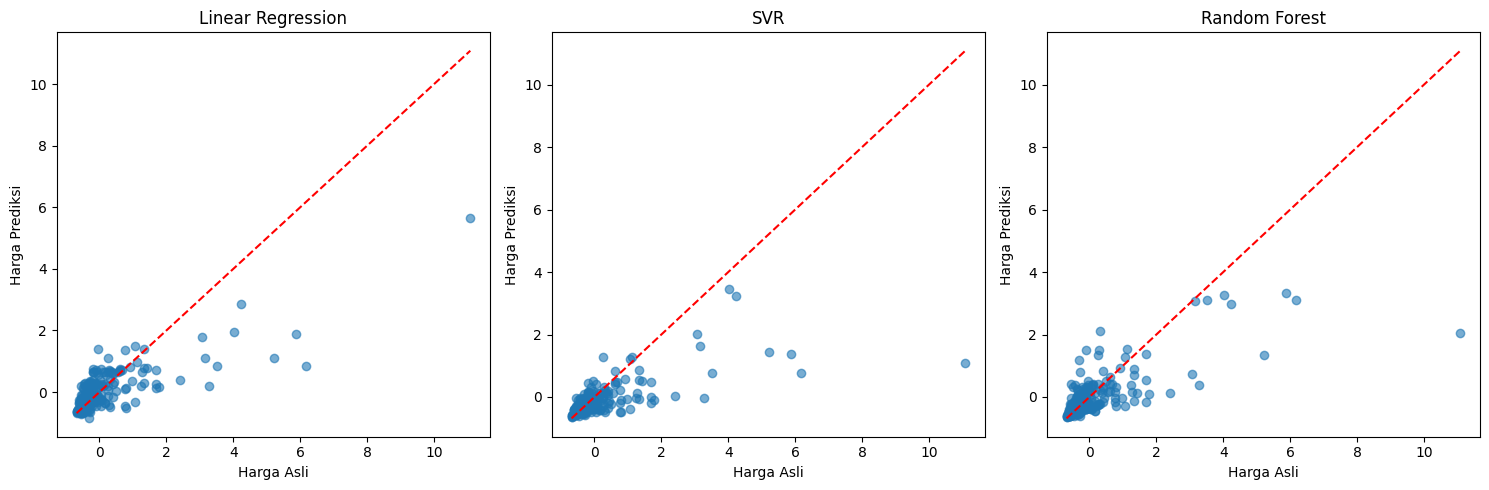

In [21]:
plt.figure(figsize=(15,5))
models = [("Linear Regression", y_pred_lr),
          ("SVR", y_pred_svr),
          ("Random Forest", y_pred_rf)]

for i, (name, y_pred) in enumerate(models, 1):
    plt.subplot(1, 3, i)
    plt.scatter(y_test, y_pred, alpha=0.6)
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
    plt.title(name)
    plt.xlabel("Harga Asli")
    plt.ylabel("Harga Prediksi")
plt.tight_layout()
plt.show()




*   Garis merah menunjukkan prediksi sempurna

*   Titik-titik biru mendekati garis merah adalah prediksi akurat
*   Model Random Forest cenderung paling rapat ke garis merah





**2. Line Plot**

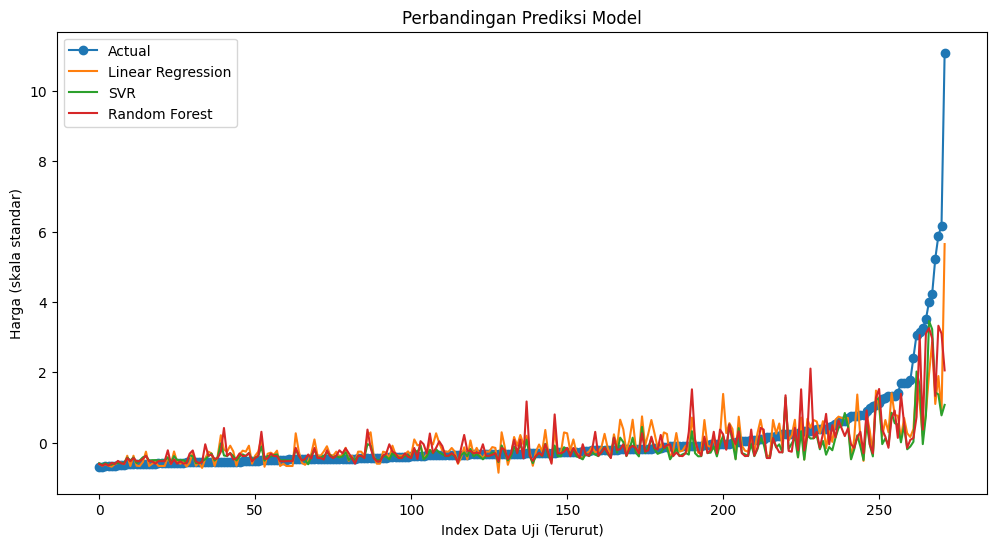

In [22]:
df_plot = pd.DataFrame({
    "Actual": y_test,
    "Linear Regression": y_pred_lr,
    "SVR": y_pred_svr,
    "Random Forest": y_pred_rf
}).sort_values("Actual").reset_index(drop=True)

plt.figure(figsize=(12,6))
plt.plot(df_plot["Actual"], label="Actual", marker="o")
plt.plot(df_plot["Linear Regression"], label="Linear Regression")
plt.plot(df_plot["SVR"], label="SVR")
plt.plot(df_plot["Random Forest"], label="Random Forest")
plt.legend()
plt.title("Perbandingan Prediksi Model")
plt.xlabel("Index Data Uji (Terurut)")
plt.ylabel("Harga (skala standar)")
plt.show()




*   Garis biru mewakili harga asli

*   Garis lain menunjukkan prediksi tiap model
*   Garis Random Forest paling mendekati garis biru adalah prediksi paling stabil


